Deterministic SIR model:

\begin{eqnarray}
\frac{dS}{dt} &=& -aS\frac{I}{N}\\
\frac{dI}{dt} &=& aS\frac{I}{N} - bI\\
\frac{dR}{dt} &=& bI
\end{eqnarray}

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [32]:
# The SIR model differential equations.
def SIRdot(Y, t, N, a, b):
    S, I, R = Y
    dSdt = -a * S * I/N 
    dIdt = a * S * I/N  - b * I
    dRdt = b * I
    
    return dSdt, dIdt, dRdt


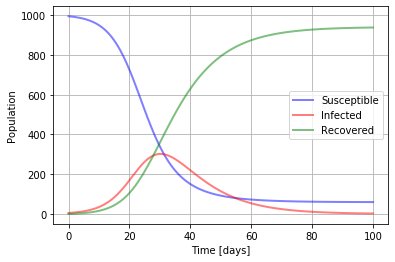

In [33]:
# Total population, N.
N = 1000
I0 = 5
R0 = 0
S0 = N - I0 - R0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
a = 0.3
b = 0.1

# A grid of time points (in days)
T = 100
dt = 1
Nt = np.int(T/dt)+1
t = np.linspace(0, T, Nt)

# Initial conditions vector
Y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
sol = odeint(SIRdot, Y0, t, args=(N, a, b))
S, I, R = sol.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.grid() 
plt.legend()


Reproduction number: $Ro = \frac{aN}{S(0)b}$

In [34]:
a*N/Y0[0]/b #reproduction number

3.015075376884422

# Stochastic SIR 

Here let's use the Gillespie algorithm to solve a stochastic version of SIR.  The probability in time interval $t$ to $t+\delta t$ of infection is 

$$p_\text{infection} = a (I/N) \delta t,$$ 

and the probability for removal in the same interval is 

$$p_\text{removal} = b \delta t.$$  

Noting that both probabilities are less than 1, we decide whether an event occurs by selecting a random number $r\in [0,1)$ and comparing this to each event probability.  Specifically, for susceptible person $i$, if $p_\text{infection}<r$, we say that person has become infected, and so the number of suceptibles $S$ decreases by 1, and the number of infectives $I$ increases by 1:

$$r<p_\text{infection} \quad\Rightarrow\quad S\rightarrow S-1, \quad I\rightarrow I+1.$$

We do a similar test for each infective person $j$.  

In [35]:
def SIRstep(N,S,I,R,a,b,dt):
    for i in range(S):
        if np.random.random_sample() < a*I*dt/N:
            S, I = S-1, I+1
    for i in range(I):
        if np.random.random_sample() < b*dt:
            I, R = I-1, R+1
            
    return S, I, R

In [37]:
# Solve stochastic SIR with same parameters and initial condition as for deterministic model above
St, It, Rt = S0, I0, R0
X = [[St, It, Rt]]     # X is a list .. 

for i in range(Nt-1):
    St, It, Rt = SIRstep(N,St,It,Rt,a,b,dt)
    X = X + [[St,It,Rt]]   # Append to list
    
X = np.asarray(X)   # Convert to numpy array
Ss = X[:,0]
Is = X[:,1]
Rs = X[:,2]


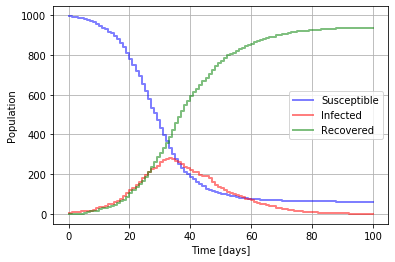

In [38]:
fig = plt.figure(facecolor='w')
plt.step(t, Ss, 'b',  alpha=0.5, lw=2, label='Susceptible')
plt.step(t, Is, 'r',  alpha=0.5, lw=2, label='Infected')
plt.step(t, Rs, 'g',  alpha=0.5, lw=2, label='Recovered')
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.grid()
plt.legend()


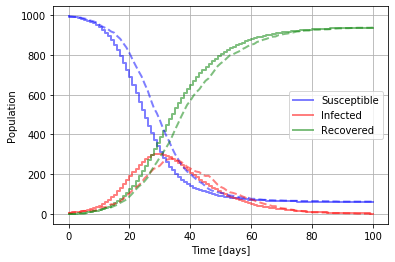

In [39]:
# And we can overlay the deterministic and stochastic models

fig = plt.figure(facecolor='w')
plt.step(t, S, 'b',  alpha=0.5, lw=2, label='Susceptible')
plt.step(t, I, 'r',  alpha=0.5, lw=2, label='Infected')
plt.step(t, R, 'g',  alpha=0.5, lw=2, label='Recovered')
plt.plot(t, Ss, 'b--', alpha=0.5, lw=2)
plt.plot(t, Is, 'r--', alpha=0.5, lw=2)
plt.plot(t, Rs, 'g--', alpha=0.5, lw=2)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.grid()
plt.legend()
